In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import os

In [3]:
df_0405 = pd.read_csv('boxC/boxC_0405_r-fixed.csv')
df_0607 = pd.read_csv('boxA/boxA_0607_refined.csv')
df_0809 = pd.read_csv('boxD/boxD_0809_fixed.csv')
df_1011 = pd.read_csv('boxA/boxA_1011.csv')
df_1213 = pd.read_csv('boxD/boxD_1213.csv')
df_1415 = pd.read_csv('boxE/boxE_1415.csv')
df_1617 = pd.read_csv('boxC/boxC_1617.csv')

vims_wave = np.loadtxt('vims_wave.txt')

In [4]:
%%capture --no-display
for df in (df_0405,df_0607,df_0809,df_1011,df_1213,df_1415,df_1617):
    for i in range(len(df['spectrum'])):
        df['spectrum'][i] = np.array([float(x) for x in df['spectrum'][i][1:-1].split(',')])

In [5]:
spectra_0405 = np.average(np.asarray(df_0405['spectrum']))
spectra_0607 = np.average(np.asarray(df_0607['spectrum']))
spectra_0809 = np.average(np.asarray(df_0809['spectrum']))
spectra_1011 = np.average(np.asarray(df_1011['spectrum']))
spectra_1213 = np.average(np.asarray(df_1213['spectrum']))
spectra_1415 = np.average(np.asarray(df_1415['spectrum']))
spectra_1617 = np.average(np.asarray(df_1617['spectrum']))

In [6]:
spectra_list = [spectra_0405,spectra_0607,spectra_0809,spectra_1011,spectra_1213,spectra_1415,spectra_1617]

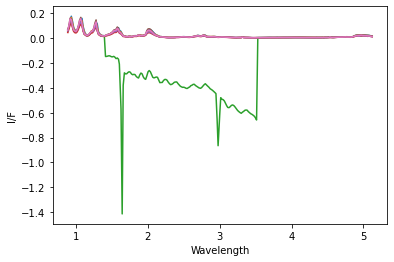

In [7]:
%matplotlib inline
x = vims_wave
for spectra in spectra_list:
    plt.plot(x,spectra)
plt.xlabel('Wavelength')
plt.ylabel('I/F')
plt.show()

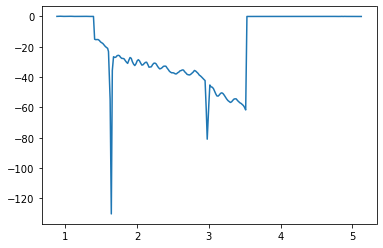

In [8]:
%matplotlib inline
plt.plot(x,np.average(df_0809['spectrum'][284:285]))
plt.show()

In [9]:
len(df_0809)

921

In [10]:
bad_data = df_0809['spectrum'][284:285]

In [11]:
my_array = []

for index, spectrum in enumerate(df_0809['spectrum']):
    k = 0
    for number in spectrum:
        if number < -20:
            k += 1
    if k >= 2:
        my_array.append(index)
# Found all spectra within 2008-2009 that have negative values (besides the ones already filtered out by previous SQL query)

In [13]:
my_array

[227, 284, 335, 400, 469, 547, 624, 716, 817, 918]

In [21]:
df_0809[227:228]

,fileid,lineres,emission,incidence,latitude,longitude,spectrum
227,26451,16742.055214,27.065549,23.174956,-11.580185,127.921876,"[0.0454172, 0.0835788, 0.126434, 0.142486, 0.0..."


In [43]:
my_array

[227, 284, 335, 400, 469, 547, 624, 716, 817, 918]

In [44]:
df_0809.loc[my_array] ##Found another bad fileID: 26451.

,fileid,lineres,emission,incidence,latitude,longitude,spectrum
227,26451,16742.055214,27.065549,23.174956,-11.580185,127.921876,"[0.0454172, 0.0835788, 0.126434, 0.142486, 0.0..."
284,26451,16749.180940,27.450764,22.823379,-11.514068,127.527944,"[0.0491795, 0.0837179, 0.120859, 0.141387, 0.0..."
335,26451,16756.492315,27.838483,22.471994,-11.447714,127.132632,"[0.0474258, 0.0870894, 0.123991, 0.137633, 0.0..."
400,26451,16763.993883,28.228707,22.120858,-11.381120,126.735899,"[0.0475275, 0.0840591, 0.125713, 0.141972, 0.0..."
469,26451,16771.690402,28.621438,21.770029,-11.314282,126.337705,"[0.0420747, 0.0842614, 0.123106, 0.142319, 0.0..."
547,26451,16779.586860,29.016683,21.419574,-11.247196,125.938009,"[0.0421858, 0.0844853, 0.123435, 0.142703, 0.0..."
624,26451,16787.688485,29.414450,21.069568,-11.179860,125.536767,"[0.0516366, 0.0831088, 0.12526, 0.141766, 0.09..."
716,26451,16796.000760,29.814750,20.720091,-11.112268,125.133936,"[0.0517987, 0.0849983, 0.124189, 0.14222, 0.09..."
817,26451,16804.529439,30.217599,20.371234,-11.044417,124.729469,"[0.0463404, 0.0869208, 0.126089, 0.144077, 0.0..."
918,26451,16813.280565,30.623012,20.023094,-10.976303,124.323320,"[0.050279, 0.0856006, 0.126554, 0.144611, 0.09..."
